# Question 1

## 1.

In [1]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
pd.set_option('display.max_columns', None)

## read in data and view the data
filepath = '../DataScienceII/nyc_airbnb_listings.csv'
data = pd.read_csv(filepath)
data.head()

## fill missing values with mean
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = [col for col in data.columns if col not in categorical_cols and col != 'price']
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

## convert categorical variables to dummy variable
data_dummies = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_dummies


## Use variables except price as predictors 
X = data_dummies.drop('price', axis=1)
y = data_dummies['price'] 


## split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35557, 40), (15239, 40))

## 2.

Mean Squared Error (MSE): 179615.0832453103
R squared score (R^2): 0.06822989424423209


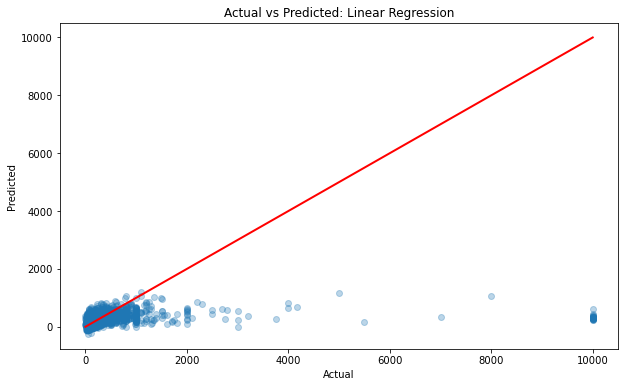

In [2]:
## standardize the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## fit the models
linear_model = LinearRegression()
model_lr = linear_model.fit(X_train_scaled, y_train)

## predict on test set
y_predict_lr = linear_model.predict(X_test_scaled)

##evaluate the model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_predict_lr))
print('R squared score (R^2):', r2_score(y_test, y_predict_lr))

## plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_lr, alpha = 0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', lw = 2) 
plt.show()


Based on the results above, the Mean Squared Error (MSE) is 179615.08, and the R-squared is 0.06823, suggesting the model is too simple to capture the underdying structure of the dataset and there is an underfitting issue.

## 3.


Lasso Regression Training Set Performance:
R-squared: 0.07643123662341411
Mean Absolute Error (MAE): 97.80429690943518
Mean Squared Error (MSE): 171891.76376119783
Root Mean Squared Error (RMSE): 414.59831615817956

Lasso Regression Test Set Performance:
R-squared: 0.06837488599644692
Mean Absolute Error (MAE): 97.8486051280911
Mean Squared Error (MSE): 179587.13353380628
Root Mean Squared Error (RMSE): 423.7772215844149


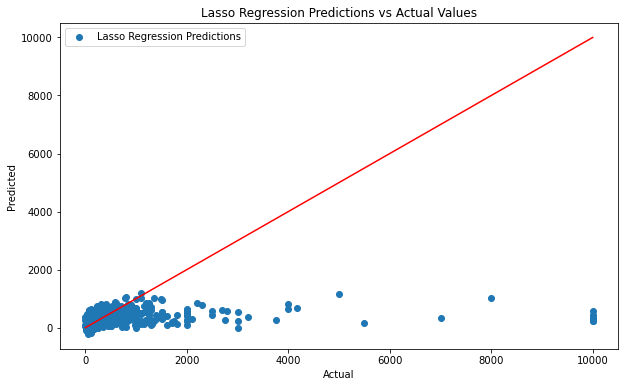

2

Lasso Regression Training Set Performance:
R-squared: 0.07057202520741523
Mean Absolute Error (MAE): 91.47657035158392
Mean Squared Error (MSE): 172982.26208085043
Root Mean Squared Error (RMSE): 415.9113632504532

Lasso Regression Test Set Performance:
R-squared: 0.0650858340037147
Mean Absolute Error (MAE): 91.92249052700664
Mean Squared Error (MSE): 180221.15617933165
Root Mean Squared Error (RMSE): 424.5246237608976


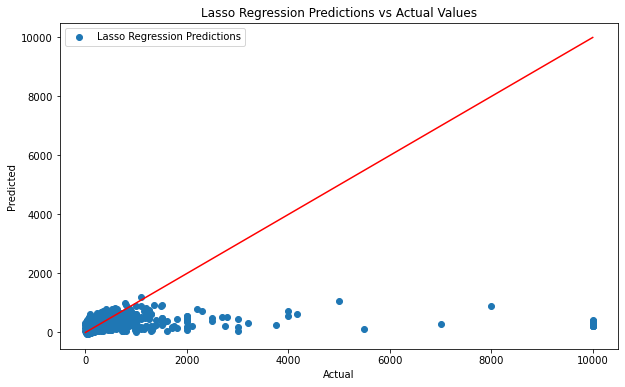

17


In [3]:
## create a function to fit and plot the model
def fit_and_plot_model(model, X_train_scaled, y_train, X_test_scaled, y_test, model_name):
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    print(f"\n{model_name} Training Set Performance:")
    print("R-squared:", r2_score(y_train, y_train_pred))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_train_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_train_pred)))

    print(f"\n{model_name} Test Set Performance:")
    print("R-squared:", r2_score(y_test, y_test_pred))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_test_pred)))

    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, label=f'{model_name} Predictions')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} Predictions vs Actual Values')
    plt.legend()
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
    plt.show()
    
## fit the lasso model with alpha = 0.5 and output the # of coefficients
lasso1 = Lasso(alpha=0.5)
lasso1.fit(X_train_scaled, y_train)
fit_and_plot_model(lasso1, X_train_scaled, y_train, X_test_scaled, y_test, "Lasso Regression")
num_zero_coefs_05 = sum(lasso1.coef_ == 0)
print(num_zero_coefs_05)

## fit the lasso model with alpha = 5 and output the # of coefficients
lasso2 = Lasso(alpha = 5.0)
lasso2.fit(X_train_scaled, y_train)
fit_and_plot_model(lasso2, X_train_scaled, y_train, X_test_scaled, y_test, "Lasso Regression")
num_zero_coefs_5 = sum(lasso2.coef_ == 0)
print(num_zero_coefs_5)

When alpha increases from 0.5 to 5, the strength of penalty increases, so it will be more coefficients shrinking to zero. This happens because a higher alpha value increases the regularization strength, which penalizes the coefficients more heavily.


Ridge Regression Training Set Performance:
R-squared: 0.07653990390481602
Mean Absolute Error (MAE): 99.04031370423861
Mean Squared Error (MSE): 171871.5389426418
Root Mean Squared Error (RMSE): 414.5739245811799

Ridge Regression Test Set Performance:
R-squared: 0.06822991776138632
Mean Absolute Error (MAE): 99.01534173002949
Mean Squared Error (MSE): 179615.078711965
Root Mean Squared Error (RMSE): 423.8101918453177


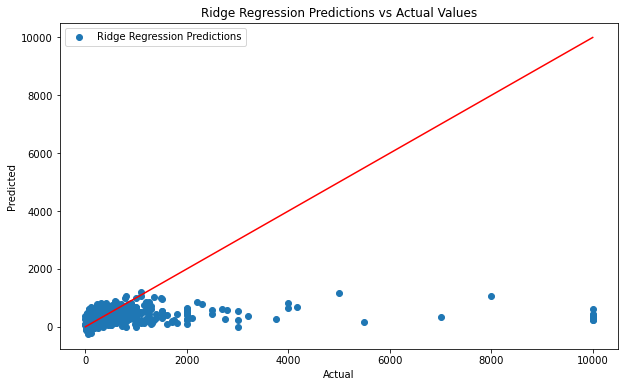


Elastic Net Regression Training Set Performance:
R-squared: 0.0763064972664339
Mean Absolute Error (MAE): 97.49530946696734
Mean Squared Error (MSE): 171914.97986478644
Root Mean Squared Error (RMSE): 414.6263135219308

Elastic Net Regression Test Set Performance:
R-squared: 0.06841209361609313
Mean Absolute Error (MAE): 97.51896822906781
Mean Squared Error (MSE): 179579.96111041683
Root Mean Squared Error (RMSE): 423.7687590070991


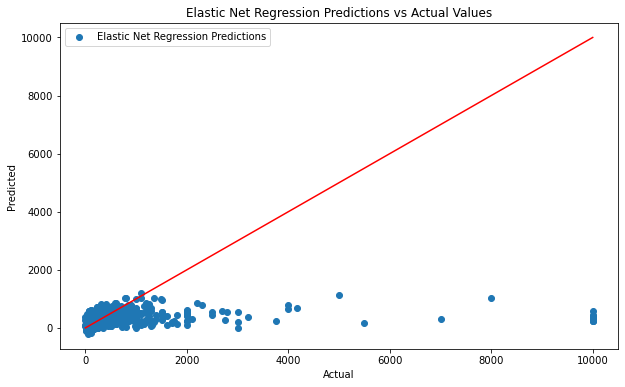

In [4]:
## fit the Ridge model with alpha = 0.05
ridge = Ridge(alpha=0.05)
fit_and_plot_model(ridge, X_train_scaled, y_train, X_test_scaled, y_test, "Ridge Regression")


## fit the Elastic Net model with alpha = 0.05
elastic_net = ElasticNet(alpha=0.05, l1_ratio=0.5)
fit_and_plot_model(elastic_net, X_train_scaled, y_train, X_test_scaled, y_test, "Elastic Net Regression")


## 4.

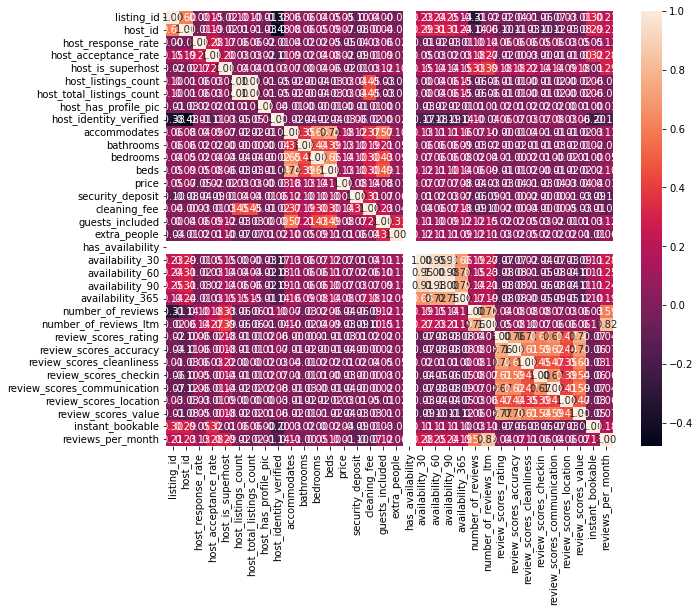


Ridge Regression Training Set Performance:
R-squared: 0.07653990335492544
Mean Absolute Error (MAE): 99.03819668855522
Mean Squared Error (MSE): 171871.53904498572
Root Mean Squared Error (RMSE): 414.5739247046125

Ridge Regression Test Set Performance:
R-squared: 0.0682303640795694
Mean Absolute Error (MAE): 99.01325793456631
Mean Squared Error (MSE): 179614.99267628184
Root Mean Squared Error (RMSE): 423.8100903426933


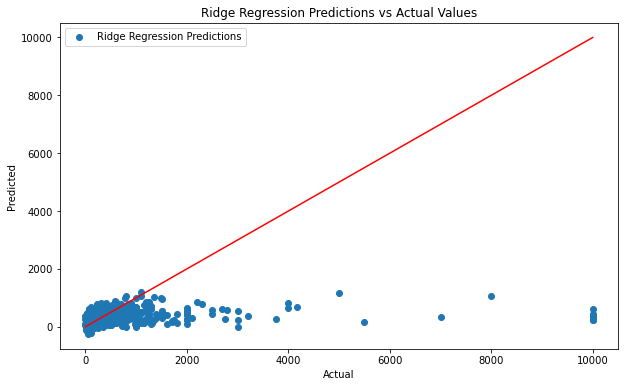


Elastic Net Regression Training Set Performance:
R-squared: 0.0688164947916533
Mean Absolute Error (MAE): 90.16836229597988
Mean Squared Error (MSE): 173308.99597600568
Root Mean Squared Error (RMSE): 416.30397064645643

Elastic Net Regression Test Set Performance:
R-squared: 0.06395864774789306
Mean Absolute Error (MAE): 90.55149012426003
Mean Squared Error (MSE): 180438.44116403093
Root Mean Squared Error (RMSE): 424.78046231439475


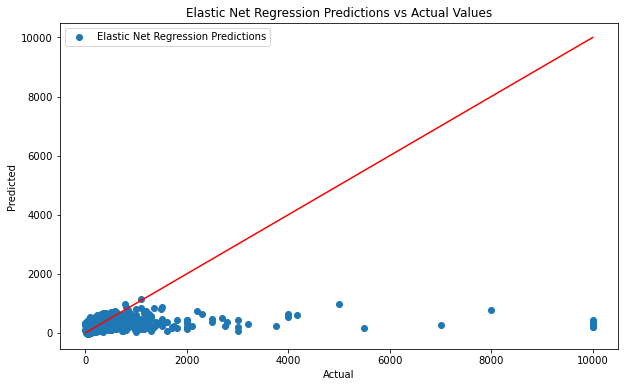


Lasso Regression Training Set Performance:
R-squared: 0.07612944865938098
Mean Absolute Error (MAE): 96.7020589843758
Mean Squared Error (MSE): 171947.93160432615
Root Mean Squared Error (RMSE): 414.66604828985714

Lasso Regression Test Set Performance:
R-squared: 0.06834140894993868
Mean Absolute Error (MAE): 96.81775372859067
Mean Squared Error (MSE): 179593.58682358047
Root Mean Squared Error (RMSE): 423.784835528102


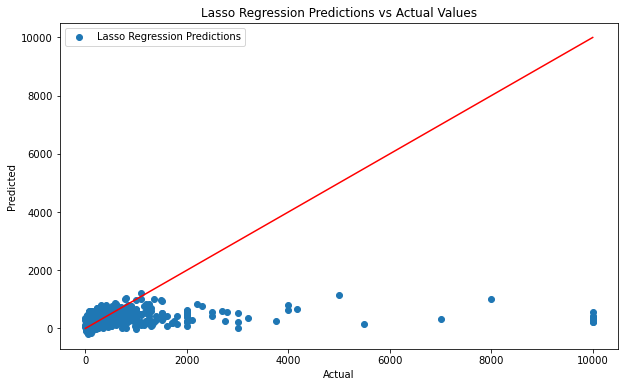

Original Linear Regression - MSE: [179615.0832453103], R²: [0.06822989424423209]


In [16]:
## detect multicollinearity using heat map
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

## initial model with preferred alpha
lasso = Lasso(alpha = 1)
ridge = Ridge(alpha=1)
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)

## fit and plot model
fit_and_plot_model(ridge, X_train_scaled, y_train, X_test_scaled, y_test, "Ridge Regression")
fit_and_plot_model(elastic_net, X_train_scaled, y_train, X_test_scaled, y_test, "Elastic Net Regression")
fit_and_plot_model(lasso, X_train_scaled, y_train, X_test_scaled, y_test, "Lasso Regression")

# Compare to original Linear Regression model's performance
print('Original Linear Regression - MSE: [179615.0832453103], R²: [0.06822989424423209]')

Alpha = 1 is a moderate point, for it will not get too extreme in shrinkig coefficient while imposing regularization effects. For Ridge regression: in training set, MSE is 171871.539 and R^2 is 0.0765; in testing set, MSE is 179614.993 and R^2 is 0.0682. For elastic net regression: in training set, MSE is 173308.996, and R^2 is 0.0688; in testing set, MSE is 180438.441, and R^2 is 0.0640. For Lasso regression: in training set, the MSE is 171947.932, and R^2 is 0.0761; in testing set, the MSE is 179593.587, and R^2 is 0.0683. For comparison, The MSE and R^2 in OLS model respectively are 179615.083 and 0.0682. Among the four models, Lasso's MSE is the lowest and R^2 is the highest, indicating that it performs better on test data and the model can better explain variation on dependent variable. Therefore, the Lasso model performs the best. 

## 5.

In [6]:
## fit the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train_scaled, y_train)
intercept = lasso.intercept_
coefficients = lasso.coef_

## construct the equation string
equation = f"Predicted Price = {intercept:.2f} "
equation += " ".join([f"+ ({coef:.2f}) * {feature}" for coef, feature in zip(coefficients, X.columns) if coef != 0])

print("Lasso Regression Equation:\n", equation)

Lasso Regression Equation:
 Predicted Price = 166.44 + (-9.67) * listing_id + (12.26) * host_id + (-16.97) * host_response_rate + (5.37) * host_acceptance_rate + (-0.20) * host_is_superhost + (-5.41) * host_listings_count + (-0.00) * host_total_listings_count + (2.16) * host_has_profile_pic + (4.55) * host_identity_verified + (49.54) * accommodates + (31.93) * bathrooms + (15.27) * bedrooms + (-7.82) * beds + (12.54) * security_deposit + (14.81) * cleaning_fee + (-6.39) * guests_included + (-3.03) * extra_people + (2.10) * availability_30 + (11.64) * availability_60 + (9.36) * availability_365 + (-8.63) * number_of_reviews + (-42.73) * number_of_reviews_ltm + (-0.28) * review_scores_rating + (-12.05) * review_scores_accuracy + (15.83) * review_scores_cleanliness + (-1.27) * review_scores_checkin + (-12.45) * review_scores_communication + (18.17) * review_scores_location + (-11.36) * review_scores_value + (8.40) * instant_bookable + (41.29) * reviews_per_month + (8.86) * neighbourhood_g

The specific equation is shown above. The general Lasso equation that shows the relationship between the above predictors and price will be: $$Price=β 
0+β1*(Host Response Rate)+β2*(Host Acceptance Rate)+...+βn*Xn$$. Price is the predicted value of price, β0 is the intercept term,β1,β2...βn are the coefficients for each predictor X1, X2...Xn. Each coefficient tells how much the 'price' is expected to change with a one unit change in the predictor, holding all other predictors constant. Positive coeffcients mean price increases as predictor changes one unit, while negative coefficients mean price decreases as predictor changes one unit. For example, the coefficient for 'host_response_rate' is -16.97. It means that price will decrease 16.97 dollars when the host_response_rate becomes one percent higher. The coefficient for 'neighbourhood_group_Manhattan' is 50.92, meaning that price will increase 50.92 dollars when the room is in Manhattan. The coefficient for 'host_has_profile_pic' is 2.16, indicating that 'price' and 'host_has_profile_pic' are positively correlated and the 'price' will increase 2.16 dollars when the host has a profile picture. 

# Question 2

## 1.

In [12]:
## read in data and view the data
file_path = '../DataScienceII/MERGED2021_22_PP.csv'
doe = pd.read_csv(file_path, low_memory = False)
doe.shape
doe.head()
doe_dictionary = pd.read_csv('DOE_Data_Dictionary.csv')
cost_related_features = doe_dictionary[doe_dictionary['dev-category'] == 'cost']
cost_related_features


,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,INDEX,VARIABLE NAME,VALUE,LABEL,SOURCE,SHOWN/USE ON SITE,NOTES,Unnamed: 11,Unnamed: 12,Unnamed: 13
296,Average net price for Title IV institutions (p...,cost,avg_net_price.public,integer,integer,NPT4_PUB,NaN,NaN,IPEDS,Yes,The average annual total cost of attendance (C...,NaN,NaN,NaN
297,Average net price for Title IV institutions (p...,cost,avg_net_price.private,integer,integer,NPT4_PRIV,NaN,NaN,IPEDS,Yes,ibid,NaN,NaN,NaN
298,"Average net price for $0-$30,000 family income...",cost,net_price.public.by_income_level.0-30000,integer,integer,NPT41_PUB,NaN,NaN,IPEDS,Yes,The average annual total cost of attendance (C...,NaN,NaN,NaN
299,"Average net price for $30,001-$48,000 family i...",cost,net_price.public.by_income_level.30001-48000,integer,integer,NPT42_PUB,NaN,NaN,IPEDS,Yes,ibid,NaN,NaN,NaN
300,"Average net price for $48,001-$75,000 family i...",cost,net_price.public.by_income_level.48001-75000,integer,integer,NPT43_PUB,NaN,NaN,IPEDS,Yes,ibid,NaN,NaN,NaN
301,"Average net price for $75,001-$110,000 family ...",cost,net_price.public.by_income_level.75001-110000,integer,integer,NPT44_PUB,NaN,NaN,IPEDS,Yes,ibid,NaN,NaN,NaN
302,"Average net price for $110,000+ family income ...",cost,net_price.public.by_income_level.110001-plus,integer,integer,NPT45_PUB,NaN,NaN,IPEDS,Yes,ibid,NaN,NaN,NaN
303,"Average net price for $0-$30,000 family income...",cost,net_price.private.by_income_level.0-30000,integer,integer,NPT41_PRIV,NaN,NaN,IPEDS,Yes,ibid,NaN,NaN,NaN
304,"Average net price for $30,001-$48,000 family i...",cost,net_price.private.by_income_level.30001-48000,integer,integer,NPT42_PRIV,NaN,NaN,IPEDS,Yes,ibid,NaN,NaN,NaN
305,"Average net price for $48,001-$75,000 family i...",cost,net_price.private.by_income_level.48001-75000,integer,integer,NPT43_PRIV,NaN,NaN,IPEDS,Yes,ibid,NaN,NaN,NaN


I am interested in 'Cost of attendance: on-campus room and board' feature. In other words, it is to predict the cost of on-campus room and board. My own experience is that in China, many schools have free tuition fees, but students need to pay for accommodation and meals, so it is necessary for parents and students to understand the cost of accommodation and meals. There are many students who stay and eat at school (many families can't afford a house near the school, so students stay at school to sleep and eat to avoid commuting). Setting 'Cost of attendance: on-campus room and board' as target also helps schools in setting competitive, fair room and board rates.

## 2.

In [13]:
## select predictors to create a new dataframe
X = ['ADM_RATE', 'UGDS_WOMEN','D_PCTPELL_PCTFLOAN','PREDDEG', 'AVGFACSAL', 'SAT_AVG','SAT_AVG_ALL',
     'CCSIZSET','CCUGPROF', 'ICLEVEL','STUFACR']
y = ['ROOMBOARD_ON']
new_doe = doe.loc[:, ['ADM_RATE', 'UGDS_WOMEN','D_PCTPELL_PCTFLOAN','PREDDEG', 'AVGFACSAL', 'SAT_AVG','SAT_AVG_ALL',
                      'CCSIZSET','CCUGPROF', 'ICLEVEL','STUFACR','ROOMBOARD_ON']]

## view the data and detect missing values
new_doe.head()
new_doe.isnull().sum()

## impute numeric columns with mean
numeric_cols_mean = ['ADM_RATE', 'UGDS_WOMEN', 'D_PCTPELL_PCTFLOAN', 'AVGFACSAL', 'SAT_AVG', 'SAT_AVG_ALL', 'ROOMBOARD_ON']
for col in numeric_cols_mean:
    new_doe[col].fillna(new_doe[col].mean(), inplace=True)
    
## impute categorical columns with mode
categorical_cols = [ 'PREDDEG', 'CCSIZSET', 'CCUGPROF', 'ICLEVEL', 'STUFACR']
for col in categorical_cols:
    new_doe[col].fillna(new_doe[col].mode()[0], inplace=True)


In [14]:
## check for missing values
print(new_doe.isnull().sum())

## view the data
new_doe.head()

ADM_RATE              0
UGDS_WOMEN            0
D_PCTPELL_PCTFLOAN    0
PREDDEG               0
AVGFACSAL             0
SAT_AVG               0
SAT_AVG_ALL           0
CCSIZSET              0
CCUGPROF              0
ICLEVEL               0
STUFACR               0
ROOMBOARD_ON          0
dtype: int64


,ADM_RATE,UGDS_WOMEN,D_PCTPELL_PCTFLOAN,PREDDEG,AVGFACSAL,SAT_AVG,SAT_AVG_ALL,CCSIZSET,CCUGPROF,ICLEVEL,STUFACR,ROOMBOARD_ON
0,0.716000,0.5940,5093.0,3,8779.0,954.000000,954.000000,14.0,10.0,1,18.0,9520.000000
1,0.885400,0.6210,13878.0,3,11590.0,1266.000000,1266.000000,15.0,9.0,1,19.0,12307.000000
2,0.731713,0.6853,298.0,3,4672.0,1164.447876,1169.892491,6.0,5.0,1,13.0,10751.527495
3,0.736700,0.4047,8027.0,3,9820.0,1300.000000,1300.000000,13.0,15.0,1,19.0,10764.000000
4,0.979900,0.6495,3614.0,3,7701.0,955.000000,955.000000,14.0,10.0,1,13.0,6050.000000


I selected 11 predictors that I think are associated with target. They are 'UGDS_WOMEN','D_PCTPELL_PCTFLOAN', 'ADM_RATE', 'PREDDEG', 'SAT_AVG', 'SAT_AVG_ALL', 'AVGFACSAL', 'CCSIZSET','CCUGPROF','ICLEVEL', 'STUFACR'. The reason for choosing 'UGDS_WOMEN' is that the sex ratio of students enrolled may be related to the cost of accommodation and meals in the school. The reason for choosing 'D_PCTPELL_PCTFLOAN' is that the more students, the larger the school, and the lower the price of accommodation and meals in large schools, because the fixed costs of operating these services are spread over a larger number of students. ADM_RATE' (Admission Rate) Competitive schools may offer more expensive or cheaper housing options. 'PREDDEG' is chosen because schools may set up different student room types for students with different degrees, and different room types have different costs. 'SAT_AVG' and 'SAT_AVG_ALL' are chosen because the more selective the school, the higher the sat score of the admitted students. Such schools often have rich financial and educational resources, and are more likely to develop school facilities, which will affect the price of accommodation and meals. 'AVGFACSAL' is chosen because the higher the salary of teaching staff, the more expensive the school's accommodation and catering may be. The reason for choosing 'CCSIZSET','CCUGPROF', and'ICLEVEL' is that the school system (school characteristics) will affect the provision of rooms and meals, which will affect the cost. The reason for choosing 'STUFACR' is that schools with a low undergraduate student-to-instructional faculty ratio emphasize personalization and high-quality education. They may promote high-quality accommodation and meals, which could lead to higher costs.

ADM_RATE             -0.257522
UGDS_WOMEN            0.259167
D_PCTPELL_PCTFLOAN    0.181724
PREDDEG               0.351597
AVGFACSAL             0.652171
SAT_AVG               0.601722
SAT_AVG_ALL           0.592873
CCSIZSET              0.492659
CCUGPROF              0.464604
ICLEVEL              -0.326622
STUFACR              -0.183006
ROOMBOARD_ON          1.000000
dtype: float64

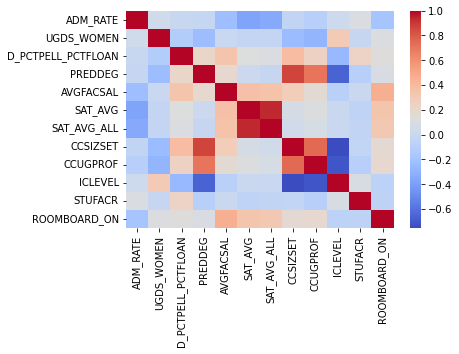

In [15]:
## visualize the relationships between dataset features
sns.heatmap(new_doe.corr(), cmap = 'coolwarm')
new_doe = doe.loc[:, ['ADM_RATE', 'UGDS_WOMEN','D_PCTPELL_PCTFLOAN','PREDDEG', 'AVGFACSAL', 'SAT_AVG','SAT_AVG_ALL',
                      'CCSIZSET','CCUGPROF', 'ICLEVEL','STUFACR','ROOMBOARD_ON']]

new_doe.corrwith(new_doe["ROOMBOARD_ON"])

In [16]:
## remove infinity value
new_doe.replace([np.inf, -np.inf], np.nan, inplace=True)
new_doe.dropna(inplace=True)
new_doe.fillna(0, inplace=True)

## select predictors and target variable
X = new_doe[['ADM_RATE', 'UGDS_WOMEN', 'D_PCTPELL_PCTFLOAN', 'PREDDEG', 'AVGFACSAL', 'SAT_AVG', 'SAT_AVG_ALL',
        'CCSIZSET', 'CCUGPROF', 'ICLEVEL', 'STUFACR']]
#X = new_doe[['ADM_RATE', 'UGDS_WOMEN', 'D_PCTPELL_PCTFLOAN', 'AVGFACSAL', 'SAT_AVG', 'SAT_AVG_ALL']]
y = new_doe['ROOMBOARD_ON']

## split the data into training and testing sets with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## detect multicollinearity among predictors
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif_data = pd.DataFrame()
#vif_data['feature'] = X.columns
#vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
#print(vif_data)

## 3.

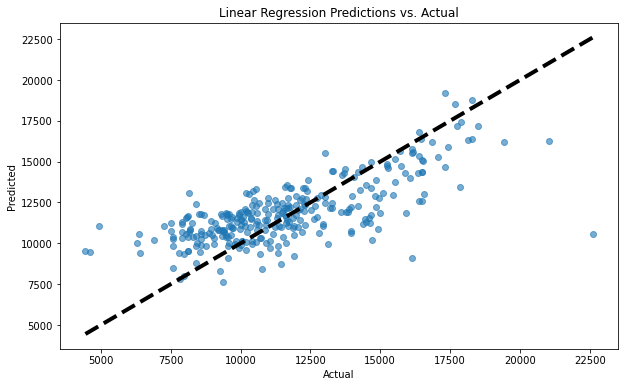

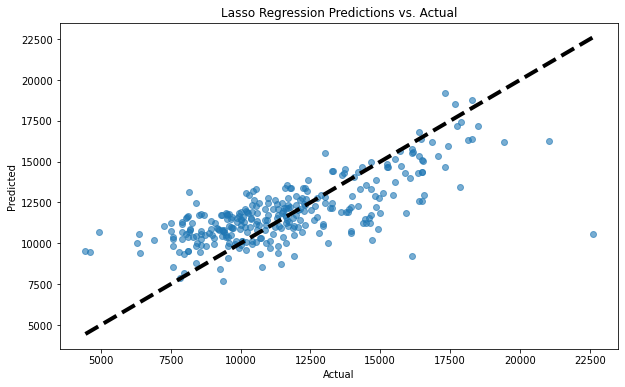

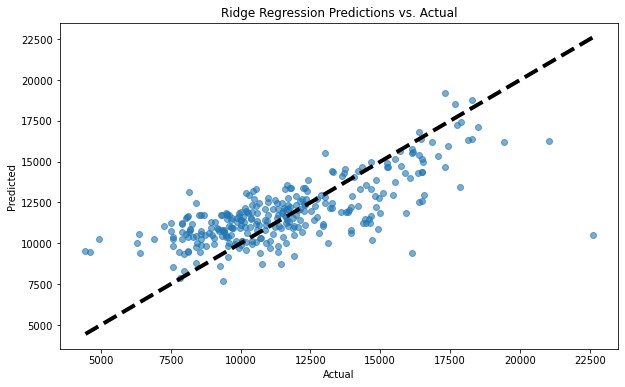

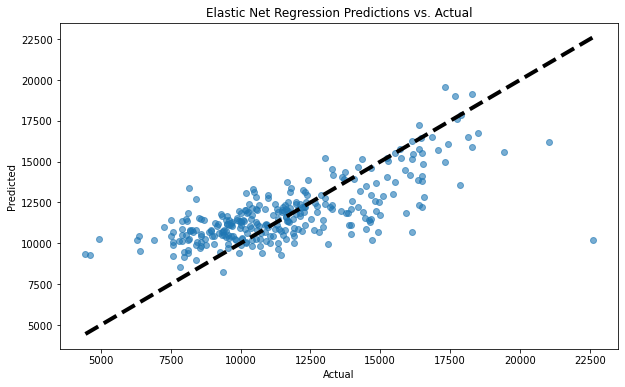

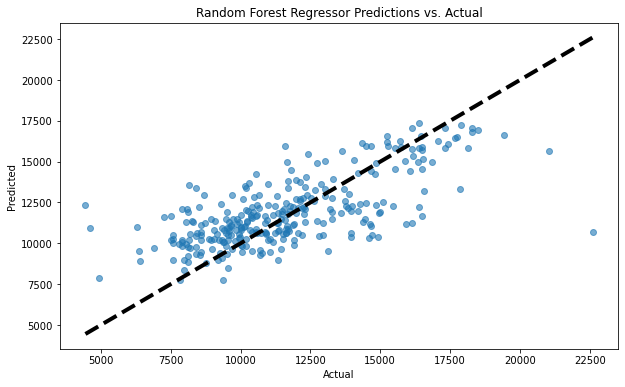

In [17]:
## initialize the models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=1.0)
ridge_model = Ridge(alpha=1.0)
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

## fit the models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

## predict using the models
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_elastic_net = elastic_net_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

## plot the models
def plot_predictions_vs_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} Predictions vs. Actual')
    plt.show()

plot_predictions_vs_actual(y_test, y_pred_linear, 'Linear Regression')
plot_predictions_vs_actual(y_test, y_pred_lasso, 'Lasso Regression')
plot_predictions_vs_actual(y_test, y_pred_ridge, 'Ridge Regression')
plot_predictions_vs_actual(y_test, y_pred_elastic_net, 'Elastic Net Regression')
plot_predictions_vs_actual(y_test, y_pred_random_forest, 'Random Forest Regressor')

I chose Linear regression because it is simple and direct. It provides the intuitive images of predictors and target variables, and shows linear relationships without regularization. The reason for choosing Lasso regression is that it can effectively perform feature selection and help to mitigate overfitting. Although feature selection is not performed like Lasso, Ridge regression is also a good model in the case of multicollinearity among predictors. Elastic Net Regression is chosen because it has both the advantages of Lasso and Ridge, and can also adapt to a variety of data characteristics. Random forest is chosen as the fifth model because it can capture more complex interactions between predictors and model non-linear relationships. The reasons for choosing the selected 11 predictors are in question 2.2

## 4.

In [18]:
## models are stored in a dictionary named 'models'
models = {
    'Linear Regression': linear_model,
    'Lasso Regression': lasso_model,
    'Ridge Regression': ridge_model,
    'Elastic Net Regression': elastic_net_model,
    'Random Forest Regressor': random_forest_model
}

In [19]:
## evaluate the models (using Adjusted-R2 and BIC)
def calculate_adjusted_r_squared(r_squared, n, p):
    return 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
def calculate_bic(n, p, rss):
    bic = n * np.log(rss / n) + p * np.log(n)
    return bic

## calculate n for the training set
n_train = X_train.shape[0]  ## number of samples in the training set
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    r_squared_train = r2_score(y_train, y_train_pred)

    ## determine the number of predictors used by the model
    p_train = len(model.coef_) + 1 if hasattr(model, 'coef_') else X_train.shape[1]
    adjusted_r_squared_train = calculate_adjusted_r_squared(r_squared_train, n_train, p_train)
    
    rss_train = ((y_train - y_train_pred) ** 2).sum()
    bic_train = calculate_bic(n_train, p_train, rss_train)
    
    print(f"{name} - Training Data - Adjusted R-squared: {adjusted_r_squared_train}, BIC: {bic_train}")

## calculate n for the test set
n = X_test.shape[0]  ## number of samples in the test set
for name, model in models.items():
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)

    p = len(model.coef_) + 1 if hasattr(model, 'coef_') else X_train.shape[1]
    adjusted_r_squared = calculate_adjusted_r_squared(r_squared, n, p)
    
    rss = ((y_test - y_pred) ** 2).sum()
    bic = calculate_bic(n, p, rss)
    
    print(f"{name} - Test Data - Adjusted R-squared: {adjusted_r_squared}, BIC: {bic}")

 

Linear Regression - Training Data - Adjusted R-squared: 0.4638683504390998, BIC: 10675.553921056387
Lasso Regression - Training Data - Adjusted R-squared: 0.46377081246844687, BIC: 10675.680168396793
Ridge Regression - Training Data - Adjusted R-squared: 0.46341954268918994, BIC: 10676.134640887209
Elastic Net Regression - Training Data - Adjusted R-squared: 0.44776190864093834, BIC: 10696.095996572687
Random Forest Regressor - Training Data - Adjusted R-squared: 0.919378582925394, BIC: 9355.166695922842
Linear Regression - Test Data - Adjusted R-squared: 0.49394123229794684, BIC: 4618.538960214691
Lasso Regression - Test Data - Adjusted R-squared: 0.49712898220938273, BIC: 4616.655870532344
Ridge Regression - Test Data - Adjusted R-squared: 0.5003895164183824, BIC: 4614.717395619558
Elastic Net Regression - Test Data - Adjusted R-squared: 0.5077654968097444, BIC: 4610.285084710036
Random Forest Regressor - Test Data - Adjusted R-squared: 0.45798810842581295, BIC: 4634.338921495854


According to the above results, it can be seen that there is evidence of overfitting in the Random Forest model, because adjusted R-squared is 0.919 on the training set and 0.458 on the test set, the BIC score in the test data is about the same as that of other models, showing a significant decline from training data to test data. This shows that the Random Forest model captures noise and cannot be well generalized to unseen data. When it comes to other models, Linear Regression model's adjusted R-squared is 0.464 on the training set and 0.494 on the test set, which shows that the performance of the model is similar in the training set and the test set. Moreover, BIC scores also show a significant decrease from training to testing. These indicate that the model does not overfit. The performance of the Lasso Regression model is similar to that of the Linear Regression model. The adjusted R-squared is 0.464 on the training set and 0.497 on the test set, which are very close. BIC scores have also decreased significantly from the training set to the test set. The adjusted R-squared of the Ridge Regression model is 0.463 on the training set and 0.500 on the test set, which is similar to the Linear Regression model and the Lasso Regression model. The BIC score showed a consistent and significant downward trend. Elastic Net Regression's adjusted R squared showed a slight decline from 0.448 of training data to 0.508 of test data. BIC scores is higher on the training data compared to the test data. In summary, the linear models (Linear, Lasso, and Ridge Regression) and Elastic Net Regression show no significant evidence of overfitting. However, Random Forest model exhibits clear signs of overfitting given its much lower performance on the test data. While it captures the training data patterns well, it fails to generalize the patterns effectively to new data.

## 5.

In [20]:
## fit the model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
intercept = elastic_net.intercept_
coefficients = elastic_net.coef_

## construct the equation string
equation = f"ROOMBOARD_ON = {intercept:.2f} "
equation += " ".join([f"+ ({coef:.2f}) * {feature}" for coef, feature in zip(coefficients, X.columns) if coef != 0])

print("Elastic Net Equation:\n", equation)

Elastic Net Equation:
 ROOMBOARD_ON = 166.44 + (-12.39) * ADM_RATE + (13.87) * UGDS_WOMEN + (-17.49) * D_PCTPELL_PCTFLOAN + (6.65) * PREDDEG + (-1.30) * AVGFACSAL + (-3.49) * SAT_AVG + (-3.40) * SAT_AVG_ALL + (3.08) * CCSIZSET + (5.99) * CCUGPROF + (48.29) * ICLEVEL + (32.24) * STUFACR


Considering the adjusted R-squared and BIC score, the best-performing model is Elastic Net. Compared with other models, Elastic Net not only provides a good balance between model complexity (as shown by BIC) but also maintains robust predictive performance on new, unseen data (as shown by Adjusted R-squared). Elastic Net model's coefficients can provide insights into which features are the most predictive of the cost of on-campus rooms and board. From the above equation，’ICLEVEL’ has the highest positive coefficient, and is the most predictive of higher room and board costs, suggesting school system is key factor driving up costs. The insights can help students and families make financial planning and have a clearer understanding of what factors may lead to higher accommodation and meal costs in different institutions. Understanding the factors that siginificantly influence the cost of on-campus room and board can inform institutions' policy decision, for example, to make recommendations to the president of an institution for competitive room and board price. The results can also help broader market analysis in the field of education, and help compare and contrast institutions based on various characteristics that affect accommodation and meal costs.